In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

PassengerId = test["PassengerId"]

dataset = [train, test]

In [4]:
# preview the train data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# preview the test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()
print('')
print('')
print('')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclas

In [7]:
train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by = 'Survived', ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


In [8]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by = 'Survived', ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [9]:
train[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by = 'Survived', ascending = False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [10]:
train[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by = 'Survived', ascending = False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [11]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by = 'Survived', ascending = False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


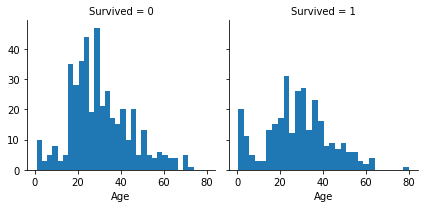

In [12]:
AgeHist = sns.FacetGrid(train, col = 'Survived')
AgeHist.map(plt.hist, 'Age', bins = 30)

In [13]:
train = train.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)
test = test.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)
dataset = [train, test]

In [14]:
# match and extract world followed by "." to get the title from the name column
for table in dataset:
    table['Title'] = table.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [15]:
for table in dataset:
    table['Title'] = table['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    table['Title'] = table['Title'].replace('Mlle', 'Miss')
    table['Title'] = table['Title'].replace('Ms', 'Miss')
    table['Title'] = table['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [16]:
for table in dataset:
    table['Title'] = table['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    table['Title'] = table['Title'].fillna(0)
    table.drop(['Name'], axis = 1, inplace = True)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [17]:
for table in dataset:
    table['Sex'] = table['Sex'].map({"female": 1, "male": 0})
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [18]:
for table in dataset:
    table['Age'].fillna(table['Age'].dropna().median(), inplace = True)
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [19]:
train['AgeBand'] = pd.cut(train['Age'], 7)
train[['AgeBand', 'Survived']].groupby(['AgeBand']).mean().sort_values(by = 'AgeBand', ascending = True)

,Survived
AgeBand,
"(0.34, 11.789]",0.573529
"(11.789, 23.157]",0.359551
"(23.157, 34.526]",0.353659
"(34.526, 45.894]",0.417910
"(45.894, 57.263]",0.411765
"(57.263, 68.631]",0.346154
"(68.631, 80.0]",0.142857


In [20]:
for table in dataset:    
    table.loc[ table['Age'] <= 12, 'Age'] = 0
    table.loc[(table['Age'] > 12) & (table['Age'] <= 23), 'Age'] = 1
    table.loc[(table['Age'] > 23) & (table['Age'] <= 34), 'Age'] = 2
    table.loc[(table['Age'] > 34) & (table['Age'] <= 45), 'Age'] = 3
    table.loc[(table['Age'] > 45) & (table['Age'] <= 57), 'Age'] = 4
    table.loc[(table['Age'] > 57) & (table['Age'] <= 68), 'Age'] = 5
    table.loc[ table['Age'] > 68, 'Age'] = 6
    table['Age'] = table['Age'].astype(int)
 
train.drop(['AgeBand'], axis = 1, inplace = True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,3,1,0,71.2833,C,3
2,1,3,1,2,0,0,7.9250,S,2
3,1,1,1,3,1,0,53.1000,S,3
4,0,3,0,3,0,0,8.0500,S,1


In [21]:
for table in dataset:
    table['Family'] = table.SibSp + table.Parch + 1
    table['isAlone'] = 0
    table.loc[table['Family'] == 1, 'isAlone'] = 1
    table['isAlone'] = table['isAlone'].astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,isAlone
0,0,3,0,1,1,0,7.2500,S,1,2,0
1,1,1,1,3,1,0,71.2833,C,3,2,0
2,1,3,1,2,0,0,7.9250,S,2,1,1
3,1,1,1,3,1,0,53.1000,S,3,2,0
4,0,3,0,3,0,0,8.0500,S,1,1,1


In [22]:
for table in dataset:
    table['Embarked'] = table['Embarked'].fillna(train.Embarked.dropna().mode()[0]).map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,isAlone
0,0,3,0,1,1,0,7.2500,0,1,2,0
1,1,1,1,3,1,0,71.2833,1,3,2,0
2,1,3,1,2,0,0,7.9250,0,2,1,1
3,1,1,1,3,1,0,53.1000,0,3,2,0
4,0,3,0,3,0,0,8.0500,0,1,1,1


In [23]:
train['FareBand'] = pd.qcut(train['Fare'], 5)
train[['FareBand', 'Survived']].groupby(['FareBand']).mean().sort_values(by = 'FareBand', ascending = True)

,Survived
FareBand,
"(-0.001, 7.854]",0.217877
"(7.854, 10.5]",0.201087
"(10.5, 21.679]",0.424419
"(21.679, 39.688]",0.444444
"(39.688, 512.329]",0.642045


In [24]:
for table in dataset:   
    table['Fare'].fillna(table['Fare'].dropna().median(), inplace=True)
    
    table.loc[ table['Fare'] <= 7.854, 'Fare'] = 0
    table.loc[(table['Fare'] > 7.854) & (table['Fare'] <= 10.5), 'Fare'] = 1
    table.loc[(table['Fare'] > 10.5) & (table['Fare'] <= 21.679), 'Fare'] = 2
    table.loc[(table['Fare'] > 21.679) & (table['Fare'] <= 39.688), 'Fare'] = 3
    table.loc[(table['Fare'] > 39.688) & (table['Fare'] <= 512.329), 'Fare'] = 4
    table.loc[ table['Fare'] > 512.329, 'Fare'] = 5
    table['Fare'] = table['Fare'].astype(int)
 

train.drop(['FareBand'], axis = 1, inplace = True)    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,isAlone
0,0,3,0,1,1,0,0,0,1,2,0
1,1,1,1,3,1,0,4,1,3,2,0
2,1,3,1,2,0,0,1,0,2,1,1
3,1,1,1,3,1,0,4,0,3,2,0
4,0,3,0,3,0,0,1,0,1,1,1


In [25]:
for table in dataset:
    table['Age*Class'] = table.Age * table.Pclass
    table['Title*Class'] = table.Title * table.Pclass

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,isAlone,Age*Class,Title*Class
0,0,3,0,1,1,0,0,0,1,2,0,3,3
1,1,1,1,3,1,0,4,1,3,2,0,3,3
2,1,3,1,2,0,0,1,0,2,1,1,6,6
3,1,1,1,3,1,0,4,0,3,2,0,3,3
4,0,3,0,3,0,0,1,0,1,1,1,9,3


In [26]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test
X_train.shape, Y_train.shape, X_test.shape

((891, 12), (891,), (418, 12))

In [27]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
acc_lr = round(lr.score(X_train, Y_train) * 100, 2)
acc_lr

81.48

In [28]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lr.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.188855
7,Title,0.438079
6,Embarked,0.266311
5,Fare,0.261342
11,Title*Class,0.008046
4,Parch,-0.016985
10,Age*Class,-0.070937
2,Age,-0.269111
3,SibSp,-0.302892
8,Family,-0.317980


In [29]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.83

In [30]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

87.09

In [31]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.46

In [32]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

70.03

In [33]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


81.26

In [34]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

70.71

In [35]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

90.57

In [36]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators = 200)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

90.57

In [37]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_lr, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
sorted_model = models.sort_values(by='Score', ascending=False)
sorted_model

,Model,Score
3,Random Forest,90.57
8,Decision Tree,90.57
1,KNN,87.09
0,Support Vector Machines,82.83
2,Logistic Regression,81.48
7,Linear SVC,81.26
4,Naive Bayes,79.46
6,Stochastic Gradient Decent,70.71
5,Perceptron,70.03


In [38]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [39]:
'''# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, Y_train)

print(rf_random.best_params_)
'''

'# Use the random grid to search for best hyperparameters\n# First create the base model to tune\nrf = RandomForestClassifier()\n\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nrf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)\n\n# Fit the random search model\nrf_random.fit(X_train, Y_train)\n\nprint(rf_random.best_params_)\n'

In [40]:
'''rf_random_Y_pred = rf_random.predict(X_test)
rf_random.score(X_train, Y_train)
acc_rf_random = round(rf_random.score(X_train, Y_train) * 100, 2)
acc_rf_random'''

'rf_random_Y_pred = rf_random.predict(X_test)\nrf_random.score(X_train, Y_train)\nacc_rf_random = round(rf_random.score(X_train, Y_train) * 100, 2)\nacc_rf_random'

In [41]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": Y_pred
    })
submission.to_csv('submission2.csv', index=False)

In [42]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(random_state = 42)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model, X_train, Y_train)


best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train, Y_train)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0943 degrees.
Accuracy = -inf%.


NameError: name 'rf_random' is not defined